# Identify SNPs in RH regions

A region is defined as a group of SNPs that have a gap between any two SNPs in the group less than 60bp. 

**Criteria to identify RH regions.** Four characteristics were used to differentiate the RH regions from regions carrying real EMS-induced mutations:

 1. The RH-SNPs are more likely to be present in multiple individuals in the population, since different inbred plants are pooled and then self-pollinated to generate the commercial seed. Among the identified RH-SNPs, the mode of the distributions of SNP shared by different numbers of individuals was 18 lines in Kronos and 10 in Cadenza (Figs. 3A-B). By contrast, the mode for the non-RH region was 1 line (99% of the mutations were found in a single individual). 
 2. The RH-SNPs are expected to show a higher percent of non-EMS-type mutations than the regions containing only EMS-induced mutations. Among the identified RH-SNPs, the percentage of non-EMS-type mutations (76.4% in Kronos and 84.4% in Cadenza) was more than 75-fold higher than the percentage detected in the non-RH regions (<1% in both populations, Table 1). 
 3. SNPs from RH regions are expected to have a higher proportion of homozygous mutations due to the multiple generations of self-pollination during seed increases. The SNPs in the identified RH regions showed a six- to seven-fold lower ratio of heterozygous to homozygous mutations (Kronos = 0.33 and Cadenza = 0.30) than those in the non-RH regions (Kronos = 1.87 and Cadenza = 2.21).
 4. RH regions are expected to have a higher average SNP density than the regions including only induced mutations. Among the identified RH-SNPs, SNP densities per individual line were 25.7-fold higher than in the non-RH regions in Kronos and 13.4-fold higher in Cadenza (SI Appendix, Fig. S6).
 
**Bioinformatics pipeline to identify RH regions.** To identify these RH regions, we developed a custom pipeline (https://github.com/DubcovskyLab/wheat_tilling_pub), which uses the output files generated from the MAPS pipeline. The first step of the pipeline breaks large scaffolds in the reference into 10 kb bins to avoid calling all mutations on a large scaffold as RH if it has a small RH region. This was particularly important for the large 3B pseudomolecule. Next, for each bin in each individual the pipeline calculates a score based on the criteria described in the previous section and in SI Appendix, Table S11. Intervals with a score of 12.5 or higher are tagged as RH regions in the database and users are warned in the JBrowse viewer if they are in a RH region. Using this bioinformatics pipeline, we identified 69,651 SNPs in RH regions in the tetraploid population (1.7%), and 38,626 SNPs in RH regions in the hexaploid population (0.6%) at HetMC5/HomMC3 (Table 1).

**EMS-type and reciprocal transitions in RH Regions.** Within the identified RH regions of tetraploid wheat, we identified similar numbers of EMS-type G>A and C>T mutations (16,412) and reciprocal A>G and T>C transitions (20,358) at HetMC5/HomMC3. At the same stringency, we also detected similar numbers in Cadenza (EMS-type 6,023 and reciprocal transitions 8,669). We took advantage of this similarity to use the number of A>G and T>C transitions within the non-EMS SNPs as an estimate of the maximum number of non EMS-induced G>A and C>T SNPs that could have been incorrectly included as EMS-type mutations in the non-RH regions.

**Real EMS-type induced mutations within RH regions.** Real EMS-type induced mutations are also present within the RH regions and could be tentatively identified by their presence in single lines (see blue arrows in SI Appendix, Fig. S6). However, the relatively high SNP density in the RH regions increases the probability that a linked SNP rather than the induced mutation caused the distinctive phenotype found in the mutant line. Two different strategies can be used to avoid this problem depending on the status of the mutation. For homozygous mutations, the phenotype of the line with the putative EMS-type mutation can be compared the phenotypes of other lines carrying the same RH region(s). If only the plants carrying the putative EMS-induced mutation show the phenotype, this would suggest that the phenotype is not caused by the SNPs present in the linked RH region. For heterozygous mutations, sibling lines with and without the EMS- induced mutation can be compared.

# Input

The output from the script ```01. Kronos snp windows```

# Output

A table with the regions on each line containing residual heterogeneity. 

| Column | Description |
|--------|-------------|
| LINE   | Mutant line  |
| mut_no | Number of mutations in the block|
| ems_no | Number of EMS mutations in the block |
| hom_sum | $HOM \subset SNP_{ems\_gt=\text{Hom}}, \#HOM $ |
| avg_mut_per_pos | Average mutations per position (across lines in the region). Ideally it shoyld be 1 |
| mut_density | Mutation density of the line in the current region.   $ mut\_density= \frac{100 * mut\_no}{region\_length} $  |
| region_id | Unique identifierd of the region  |
| CHROM |  Chromosome where the region starts|
| region_start | Position of the start of the region |
| region_end | Position of the end of the region |
| region_length | Length of the region|
| window_size | Name of the region/window size.  |
| ems_per | Percentage of EMS mutations in region |
| hom_per | Percentage of Homozyglous mutations|
| no_mut_cat | Number of mutations.  $ mut\_no = 1 \implies  \text{"1 mut"} $,  $ mut\_no \neq 1 \implies  \text{">=2 mut"} $ |
| no_mut_cat_score | Mutation score. $ mut\_no = 1 \implies  0 $,  $ mut\_no \neq 1 \implies  0 $|
| per_ems_cat | Category of EMS percentage. $ems\_per = 0 \implies \text{"0%"}$,  $ems\_per \gt 0 \land ems\_per \lt 50 \implies \text{"<50% and >0%"}$,   $ems\_per \geq 50 \land ems\_per \lt 100 \implies \text{">=50% and <100%"}$, $ems\_per = 100 \implies \text{"100%"}$     |
| per_ems_cat_score | Score for EMS percentage.  $ems\_per = 0 \implies 6$,  $ems\_per \gt 0 \land ems\_per \lt 50 \implies 3.5$,   $ems\_per \geq 50 \land ems\_per \lt 100 \implies 2.5$, $ems\_per = 100 \implies 0$  |
| avg_mut_cat | Category of the average mutations. $no\_mut\_cat = 1 \implies \text{"1 MI"}$, $no\_mut\_cat \gt 1 \land no\_mut\_cat \lt 5 \implies \text{">1 and <= 4 MI"}$,   $no\_mut\_cat \geq 5 \land no\_mut\_cat \lt 7 \implies \text{">4 and <= 6 MI"}$,  $no\_mut\_cat \gt 7 \implies \text{"> 6 MI"}$  |
| avg_mut_cat_score | Score for the mutation categories. $no\_mut\_cat = 1 \implies 0$, $no\_mut\_cat \gt 1 \land no\_mut\_cat \lt 5 \implies 1.5$,   $no\_mut\_cat \geq 5 \land no\_mut\_cat \lt 7 \implies 2$,  $no\_mut\_cat \gt 7 \implies 3$    |
| mut_dens_cat |Category of the mutation density. $mut\_density \leq 0.2 \implies \text{"<= 0.2 density"} $, $mut\_density \gt 0.2 \land mut\_density \lt 0.4 \implies \text{">0.2 and <0.4 density"} $,   $mut\_density \geq 0.4 \land mut\_density \lt 0.7 \implies \text{">0.4 and <0.7 density"} $,  $mut\_density \geq 0.7 \implies \text{">= 0.7 density"} $   |
| mut_dens_cat_score | Score for the mutation density. $mut\_density \leq 0.2 \implies 0$, $mut\_density \gt 0.2 \land mut\_density \lt 0.4 \implies 1.5$,   $mut\_density \geq 0.4 \land mut\_density \lt 0.7 \implies 2$,  $mut\_density \geq 0.7 \implies 3$   |
| combined_score |  $hom\_per < 25 \lor (hom\_per > 25 \land ems\_per > 75 \land avg\_mut\_per\_pos < 4) \implies 0 $, $ (hom\_per > 25 \land ems\_per \leq 75) \lor (hom\_per > 25 \land ems\_per > 75  \land avg\_mut\_per\_pos \geq 4) \implies 12.5$   |
| score | Total RH score. $no\_mut\_cat\_score + per\_ems\_cat\_score + avg\_mut\_cat\_score + mut\_dens\_cat\_score + combined\_score$. |

The regions with $score > 12$ are selected as regions with RH. 

A simplified version of the table, only with the regions and excluding the details is saved, including only the columns: ```CHROM```, ```region_start```, ```region_end```, ```LINE```, ```region_id```


In [1]:
library(ggplot2)

In [2]:
library(sqldf)

Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite


In [3]:
snps<-read.csv(
    gzfile('./out/20190709_Kronos_snps_with_density_and_het_gap_60.tsv.gz','rt'),
    header=T, sep="\t")
snps$window_size <- "gap_60"

In [4]:
regions <- sqldf("
SELECT 
  LINE, 
  mut_no,
  ems_per, 
  SUM(CASE WHEN EMS_GT = 'Hom' THEN 
        1 
     ELSE 
        0 
     END) as 'hom_sum',
  avg_mut_per_pos, 
  mut_density, 
  region_id, 
  CHROM,
  region_start,
  region_end,
  region_length, 
  window_size
FROM snps 
GROUP BY region_id, LINE, window_size ")

colnames(regions) <- c("LINE", "mut_no", "ems_no","hom_sum" ,"avg_mut_per_pos", "mut_density", "region_id","CHROM", "region_start" , "region_end", "region_length", "window_size")
regions$ems_per <- 100.0 *  regions$ems_no / regions$mut_no


In [5]:
regions$hom_per <- 100.0 * regions$hom_sum / regions$mut_no

In [6]:
regions$no_mut_cat  <- ifelse(regions$mut_no == 1, "1 mut", ">=2 mut" )
regions$no_mut_cat_score  <- ifelse(regions$mut_no == 1, 0, 7)

In [7]:
regions$per_ems_cat <- ifelse(regions$ems_per==0, "0%",
                             ifelse(regions$ems_per < 50, "<50% and >0%",
                                   ifelse(regions$ems_per < 100, ">=50% and <100%", 
                                         "100%")))
regions$per_ems_cat_score <- ifelse(regions$ems_per==0, 6,
                             ifelse(regions$ems_per < 50, 3.5,
                                   ifelse(regions$ems_per < 100, 2.5, 
                                         0)))

In [8]:
regions$avg_mut_cat<-ifelse(regions$avg_mut_per_pos==1, "1 MI",
                             ifelse(regions$avg_mut_per_pos < 5, ">1 and <= 4 MI",
                                   ifelse(regions$avg_mut_per_pos < 7, ">4 and <= 6 MI", 
                                         "> 6 MI")))
regions$avg_mut_cat_score<-ifelse(regions$avg_mut_per_pos==1, 0,
                             ifelse(regions$avg_mut_per_pos < 5, 1.5,
                                   ifelse(regions$avg_mut_per_pos < 7, 2, 
                                         3)))

In [9]:
regions$mut_dens_cat<-ifelse(regions$mut_density <= 0.2, "<= 0.2 density",
                             ifelse(regions$mut_density < 0.4, ">0.2 and <0.4 density",
                                   ifelse(regions$mut_density < 0.7, ">0.4 and <0.7 density", 
                                         ">= 0.7 density")))
regions$mut_dens_cat_score<-ifelse(regions$mut_density <= 0.2, 0,
                             ifelse(regions$mut_density < 0.4, 1.5,
                                   ifelse(regions$mut_density < 0.7, 2, 
                                         3)))

In [10]:
regions$combined_score<-ifelse(regions$hom_per >= 25 ,
                               ifelse(regions$ems_per <= 75, 12.5,
                                     ifelse(regions$avg_mut_per_pos >= 4, 12.5,
                                            0)
                                     )
                        ,0)

In [11]:
regions$score <- regions$no_mut_cat_score + regions$per_ems_cat_score + regions$avg_mut_cat_score + regions$mut_dens_cat_score + regions$combined_score

In [12]:
non_ems_regions <-  regions[regions$score > 0 & regions$region_length > 1,]

In [13]:
unique_regions <- unique(regions[,c("region_id","region_length", "window_size")])

Warning message:
“Using alpha for a discrete variable is not advised.”

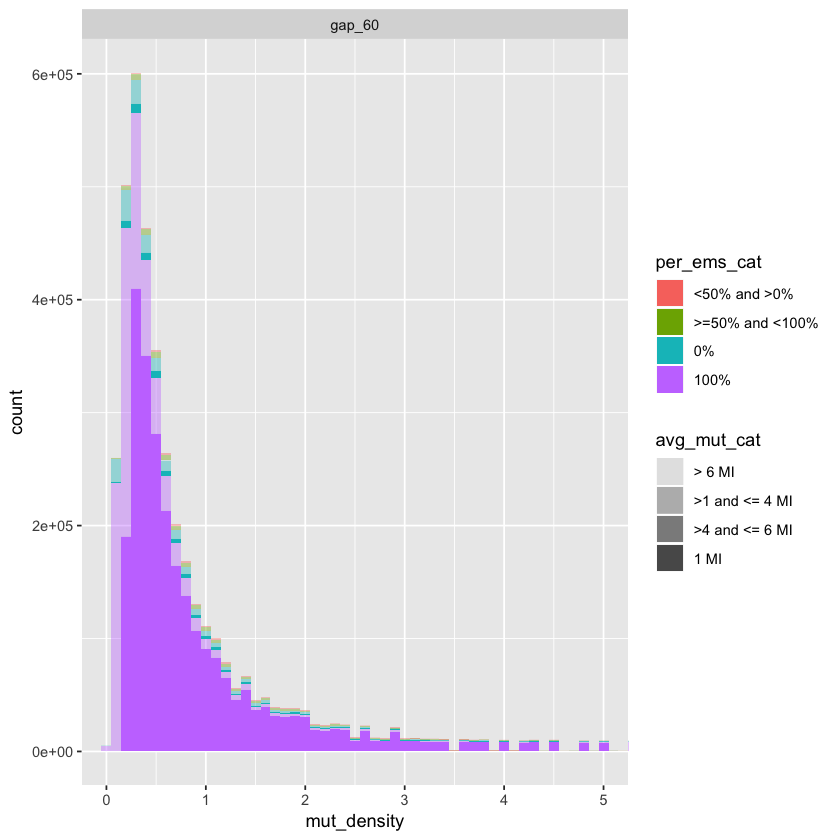

In [14]:
p <- ggplot(non_ems_regions, aes(x=mut_density, fill=per_ems_cat, alpha=avg_mut_cat )) + 
geom_histogram(binwidth = 0.1) + coord_cartesian(xlim = c(0,5))+
facet_wrap(~window_size) 
p

Warning message:
“Using alpha for a discrete variable is not advised.”

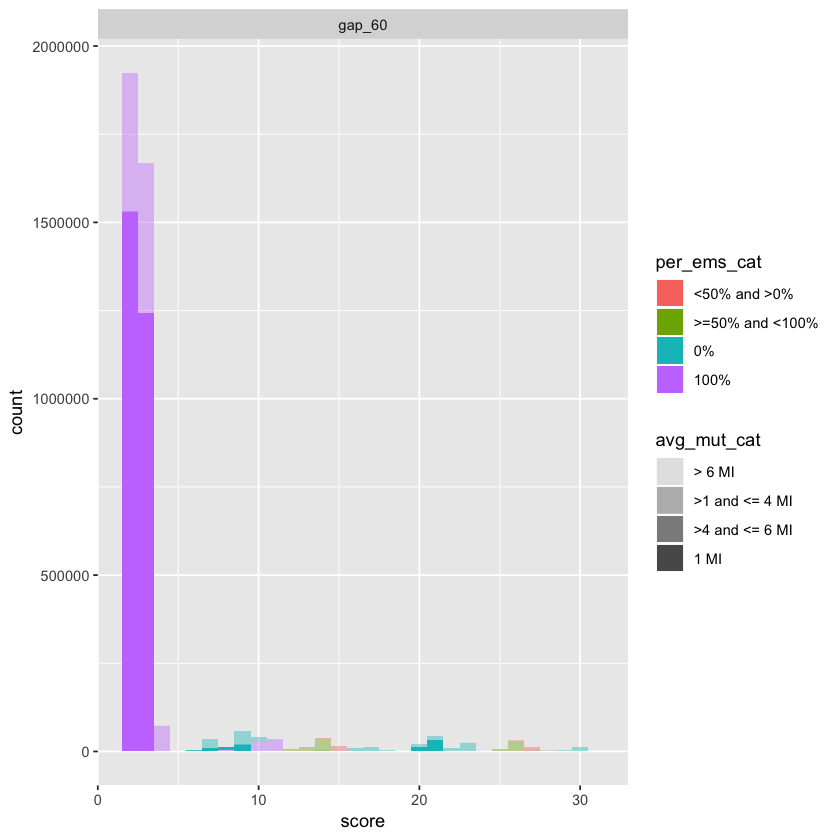

In [15]:
p <- ggplot(non_ems_regions, aes(x=score, fill=per_ems_cat, alpha=avg_mut_cat )) + 
geom_histogram(binwidth = 1) +
facet_wrap(~window_size) 
p

Warning message:
“Using alpha for a discrete variable is not advised.”

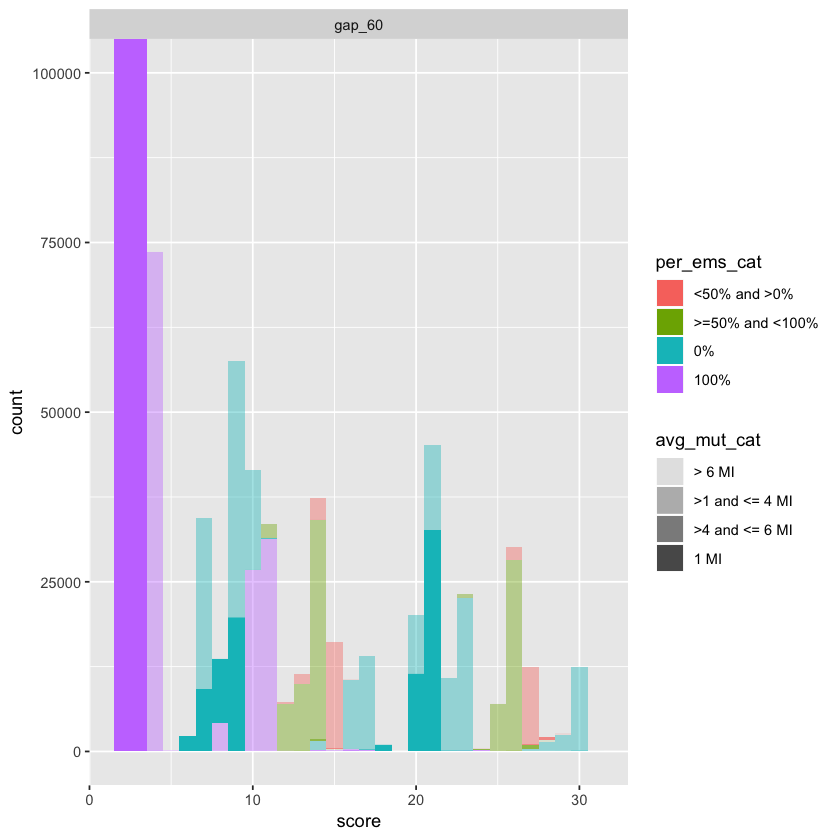

In [16]:
p <- ggplot(non_ems_regions, aes(x=score, fill=per_ems_cat, alpha=avg_mut_cat )) + 
geom_histogram(binwidth = 1) + coord_cartesian(ylim = c(0,100000)) +
facet_wrap(~window_size) 
p

In [17]:
unique_regions_over_1 <- unique_regions[unique_regions$region_length > 1,]

In [18]:
tapply(unique_regions_over_1$region_length, unique_regions_over_1$window_size, summary)

$gap_60
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2      38      85     134     178    3332 


In [19]:
rh_regions <- regions[regions$score > 12,]
head(rh_regions)

,LINE,mut_no,ems_no,hom_sum,avg_mut_per_pos,mut_density,region_id,CHROM,region_start,region_end,⋯,no_mut_cat,no_mut_cat_score,per_ems_cat,per_ems_cat_score,avg_mut_cat,avg_mut_cat_score,mut_dens_cat,mut_dens_cat_score,combined_score,score
2,Kronos4557,1,0,1,1.000000,1.8518519,1,chr1A,227237,227291,⋯,1 mut,0,0%,6.0,1 MI,0.0,>= 0.7 density,3.0,12.5,21.5
6,Kronos2317,1,0,1,1.000000,100.0000000,4,chr1A,805669,805670,⋯,1 mut,0,0%,6.0,1 MI,0.0,>= 0.7 density,3.0,12.5,21.5
101,Kronos1108,1,0,1,1.000000,0.3831418,24,chr1A,1160657,1160918,⋯,1 mut,0,0%,6.0,1 MI,0.0,>0.2 and <0.4 density,1.5,12.5,20.0
155,Kronos376,9,2,0,1.666667,6.8702290,29,chr1A,1162385,1162516,⋯,>=2 mut,7,<50% and >0%,3.5,>1 and <= 4 MI,1.5,>= 0.7 density,3.0,0.0,15.0
265,Kronos1434,2,0,0,2.500000,0.7352941,41,chr1A,1170589,1170861,⋯,>=2 mut,7,0%,6.0,>1 and <= 4 MI,1.5,>= 0.7 density,3.0,0.0,17.5
266,Kronos2303,4,0,0,2.500000,1.4705882,41,chr1A,1170589,1170861,⋯,>=2 mut,7,0%,6.0,>1 and <= 4 MI,1.5,>= 0.7 density,3.0,0.0,17.5


In [20]:
nrow(rh_regions)

[1] 280224

In [21]:
for_bed<-rh_regions[,c("CHROM", "region_start", "region_end", "LINE", "region_id")]
write.csv(for_bed, "./out/RH_Kronos_for_bed.csv")

In [22]:
gz1 <- gzfile("./out/RH_Kronos_regions.csv.gz", "w")
write.csv(rh_regions, gz1)
close(gz1)